## Monte Carlo Simulation Example

### General steps to build a Monte Carlo simulation in Python Jupyter Notebooks:

1. First, import the necessary Python libraries such as Numpy and Pandas.

2. Load the historical data from your previous campaign into a Pandas dataframe.

3. Calculate the key metrics for your campaign such as the response rate, conversion rate, and revenue per customer.

4. Define the random variables for the simulation. These could include the number of emails or direct mail pieces sent, the response rate, the conversion rate, and the revenue per customer.

5. Use Numpy's random number generator to create a series of random variables for each of the defined variables.

6. Calculate the total revenue for each simulation by multiplying the number of customers by the revenue per customer.

7. Repeat the simulation multiple times (e.g. 1000 times) to generate a distribution of possible outcomes.

8. Visualize the distribution using a histogram or other chart to help you identify the most likely outcomes and the range of possible outcomes.

9. Analyze the results and use them to guide your marketing decisions.

#### 1. Write to pandas df

In [1]:
# import packages
import pandas as pd
import numpy as np

# Load historical data into a Pandas dataframe
# Note: THIS IS SAMPLE DATA
data = pd.DataFrame({
    'Email Cost': [4000, 4800, 6000],
    'Direct Mail Cost': [2000, 2400, 3000],
    'Social Cost': [1000, 1200, 1500],
    'Paid Cost': [3000, 3600, 4500],
    'Out of Home Cost': [2500, 3000, 3500],
    'Radio Cost': [1500, 1800, 2000],
    'Community Cost': [1000, 1200, 1500],
    'Internal Cost': [500, 600, 750],
    'Emails Sent': [10000, 12000, 15000],
    'Direct Mail Sent': [5000, 6000, 7500],
    'Responses': [1000, 1200, 1800],
    'Conversions': [250, 300, 450]
})

#### 2. Define Variables for Monte Carlo Simulation

In [2]:
data.head()

,Email Cost,Direct Mail Cost,Social Cost,Paid Cost,Out of Home Cost,Radio Cost,Community Cost,Internal Cost,Emails Sent,Direct Mail Sent,Responses,Conversions
0,4000,2000,1000,3000,2500,1500,1000,500,10000,5000,1000,250
1,4800,2400,1200,3600,3000,1800,1200,600,12000,6000,1200,300
2,6000,3000,1500,4500,3500,2000,1500,750,15000,7500,1800,450


In [3]:
# Calculate response rate, conversion rate, and cost per customer
data['Response Rate'] = data['Responses'] / (data['Emails Sent'] + data['Direct Mail Sent'])
data['Conversion Rate'] = data['Conversions'] / data['Responses']
data['Cost per Customer'] = (data['Email Cost'] + data['Direct Mail Cost'] + data['Social Cost'] +
                                data['Paid Cost'] + data['Out of Home Cost'] + data['Radio Cost'] +
                                data['Community Cost'] + data['Internal Cost']) / data['Conversions']

In [4]:
data.head()

,Email Cost,Direct Mail Cost,Social Cost,Paid Cost,Out of Home Cost,Radio Cost,Community Cost,Internal Cost,Emails Sent,Direct Mail Sent,Responses,Conversions,Response Rate,Conversion Rate,Cost per Customer
0,4000,2000,1000,3000,2500,1500,1000,500,10000,5000,1000,250,0.066667,0.25,62.000000
1,4800,2400,1200,3600,3000,1800,1200,600,12000,6000,1200,300,0.066667,0.25,62.000000
2,6000,3000,1500,4500,3500,2000,1500,750,15000,7500,1800,450,0.080000,0.25,50.555556


#### 3. Generate Series of Random Variables

Use NumPy's random number generator

In [6]:
# Define the random variables for the simulation
num_simulations = 1000
# syntax is np.random.randint(low, high, number of simulations)
email_sent = np.random.randint(150000, 250001, size=num_simulations) 
direct_mail_sent = np.random.randint(150000, 300001, size=num_simulations)
response_rate = np.random.normal(data['Response Rate'].mean(), data['Response Rate'].std(), size=num_simulations)
conversion_rate = np.random.normal(data['Conversion Rate'].mean(), data['Conversion Rate'].std(), size=num_simulations)
cost_per_customer = np.random.normal(data['Cost per Customer'].mean(), data['Cost per Customer'].std(), size=num_simulations)

#### 4. Calculate Total Cost for Each Sumulation

In [7]:
# Calculate the total cost for each simulation
total_cost = (email_sent + direct_mail_sent) * cost_per_customer

#### 5. Simulation

In [9]:
# Repeat the simulation multiple times
revenues = []
for i in range(num_simulations):
    # Calculate the number of responses and conversions based on the random variables
    num_responses = int(email_sent[i] * response_rate[i] + direct_mail_sent[i] * response_rate[i])
    num_conversions = int(num_responses * conversion_rate[i])
    
    # Calculate the revenue for this simulation
    revenue = num_conversions * data['Cost per Customer'].mean()
    revenues.append(revenue)

#### 6. Visualize Distributions of Revenues

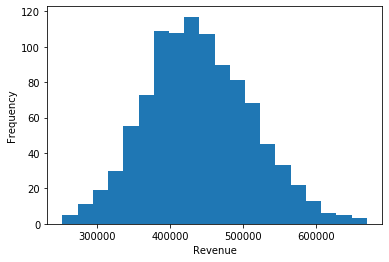

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the distribution of revenues
plt.hist(revenues, bins=20)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

#### 7. Analyze Results